In [ ]:
!pip install prophet

In [14]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly

In [3]:
df=pd.read_csv('MaunaLoaDailyTemps-1.csv')
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [4]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 99.6+ KB


In [5]:
df=df[['DATE','AvgTemp']]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [6]:
df.columns=['ds','y']
df.head()

,ds,y
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [7]:
df['ds']=pd.to_datetime(df['ds'])

<Axes: xlabel='ds'>

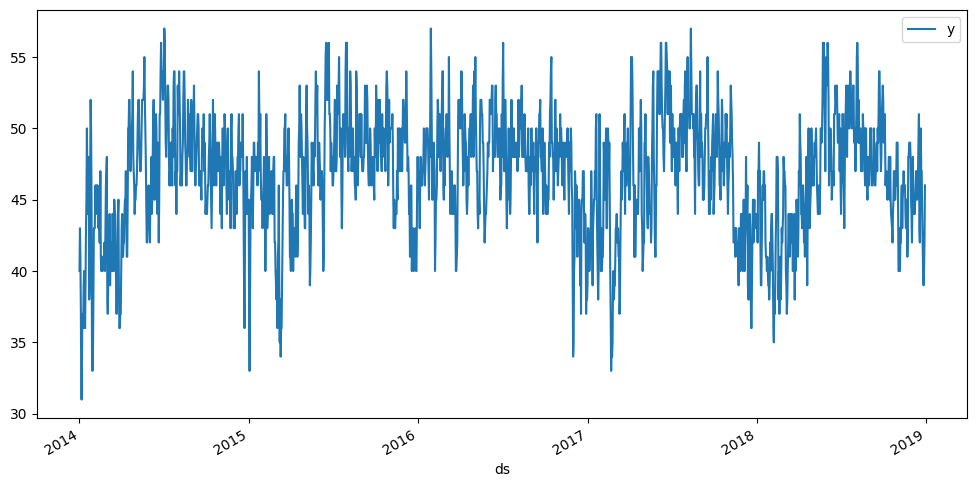

In [8]:
df.plot(figsize=(12,6),x='ds',y='y')

In [9]:
train=df.iloc[:-365]
test=df.iloc[-365:]

In [10]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcekf6528/zkj1nlx8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcekf6528/ieslbm89.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16048', 'data', 'file=/tmp/tmpcekf6528/zkj1nlx8.json', 'init=/tmp/tmpcekf6528/ieslbm89.json', 'output', 'file=/tmp/tmpcekf6528/prophet_modelcfbpkkzt/prophet_model-20240922134746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.192062,36.435165,45.647238,44.597361,47.649360,-4.948818,-4.948818,-4.948818,-0.145826,-0.145826,-0.145826,-4.802992,-4.802992,-4.802992,0.0,0.0,0.0,41.243244
1817,2018-12-26,46.191314,36.533898,45.909120,44.592791,47.655626,-4.904014,-4.904014,-4.904014,-0.052643,-0.052643,-0.052643,-4.851371,-4.851371,-4.851371,0.0,0.0,0.0,41.287300
1818,2018-12-27,46.190565,37.010540,45.929380,44.587309,47.660371,-4.772865,-4.772865,-4.772865,0.098682,0.098682,0.098682,-4.871547,-4.871547,-4.871547,0.0,0.0,0.0,41.417700
1819,2018-12-28,46.189817,37.521624,46.238544,44.577010,47.665074,-4.436219,-4.436219,-4.436219,0.426907,0.426907,0.426907,-4.863127,-4.863127,-4.863127,0.0,0.0,0.0,41.753597
1820,2018-12-29,46.189068,36.886434,45.823175,44.567088,47.669441,-4.831995,-4.831995,-4.831995,-0.005789,-0.005789,-0.005789,-4.826206,-4.826206,-4.826206,0.0,0.0,0.0,41.357073


In [11]:
plot_plotly(m,forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [15]:
plot_components_plotly(m,forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

